In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;sns.set() #for plot styling

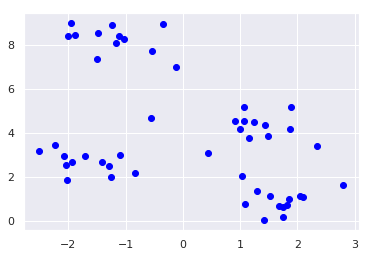

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true=make_blobs(n_samples=50,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],c='blue')
plt.show()

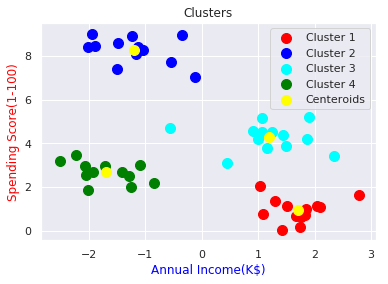

In [3]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,max_iter=300,n_init=10,init='k-means++',random_state=0)
kmeans.fit(X)
y_means=kmeans.predict(X)
#visualzing the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='blue',label="Cluster 2")
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='cyan',label='Cluster 3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label="Centeroids")
plt.title('Clusters')
plt.xlabel('Annual Income(K$)',color='blue')
plt.ylabel('Spending Score(1-100)',color='red')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
#Randomly choose the centers
def find_clusters(X,n_clusters):
    #1 randomly choose clusters
    rng=np.random.RandomState(2)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    
    while True:
        #2 assinging the label based on the closet center
        labels=pairwise_distances_argmin(X,centers)
        #3 find new centers from means of points
        new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        
        #4 check for convergence
        if np.all(centers==new_centers):
            break
        new_centers=centers
    return centers,labels
centers,labels=find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=y_means,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],s=200,color='yellow')
plt.show()

/home/krishn/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/krishn/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


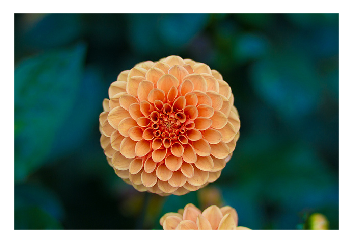

In [10]:
#Example 2 clustring in image compersion
from sklearn.datasets import load_sample_image
china=load_sample_image('flower.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)